In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xray.jpeg to xray.jpeg
Saving cafe.jpg to cafe.jpg
Saving gato_ponido.jpg to gato_ponido.jpg
Saving im0002.tif to im0002.tif
Saving keyb.tif to keyb.tif
Saving machupicchu.jpg to machupicchu.jpg
Saving cameraman.tif to cameraman.tif


In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Intro_procesamiento_de_imagenes/Data")

# 1. Operaciones pixel a pixel

## 1.1 Negativo de una imagen

Text(0.5, 1.0, 'Negativo de la imagen')

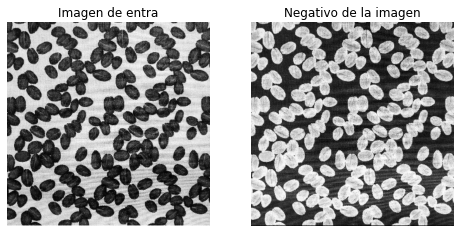

In [ ]:
a = mpimg.imread('cafe.jpg')[:,:,0] # plano rojo

plt.figure(1,figsize=(8,16)) # figure recerva un espacio en la memoria
plt.subplot(1,2,1) # 1 fila , 2 columnas
plt.axis('off') # elimina la numeracion
plt.imshow(a,cmap='gray') #  gray -> escala de grises(blanco = 255, negro = 0)
plt.title('Imagen de entra')

a_negativo = 255 - a

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(a_negativo,cmap='gray')
plt.title('Negativo de la imagen')

In [ ]:
print(a[0:5,0:5])
print(a_negativo[0:5,0:5])

[[78 62 58 85 88]
 [62 60 56 64 51]
 [73 67 56 68 63]
 [59 65 67 64 49]
 [60 46 91 68 68]]
[[177 193 197 170 167]
 [193 195 199 191 204]
 [182 188 199 187 192]
 [196 190 188 191 206]
 [195 209 164 187 187]]


## 1.2 Correccion gamma

La correción gamma es la responsable de la “sensación” de contraste de una imagen, y decimos sensación porque no es algo inherente a la imagen, si no a los dispositivos que la registran, a los dispositivos que la reproducen y a la luminosidad del entorno donde la estamos viendo.

La GAMMA es un valor numérico que aporta la valiosa información para saber cuánto se oscurecerá o brillará una imagen al ser reproducida por un dispositivo

Text(0.5, 1.0, 'Imagen con correcion gamma')

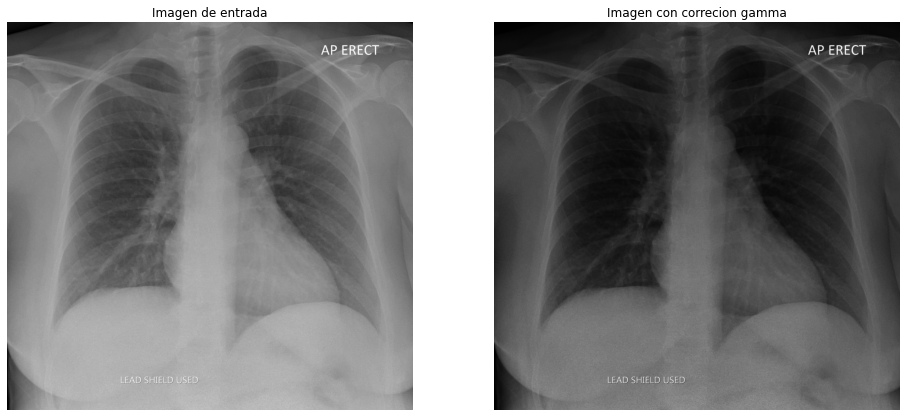

In [ ]:
############################################################
# Correccion gamma : es una operacion pixel a pixel donde elevamos a una potencia cada uno de los pixeles.
# con esta operacion vamos a poder iluminar ciertas areas que son importantes.
# Mejora la iluminacion en toda la imagen , su principal uso son imagenes satelitales.
# Nos permite iluminar o oscurecer
############################################################
a = mpimg.imread('xray.jpeg')[:,:,0]
gamma=0.5
a_powe_law = pow(a,1.0/gamma)

plt.figure(1,figsize=(16,16))

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(a,cmap='gray')
plt.title('Imagen de entrada')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(a_powe_law,cmap='gray')
plt.title('Imagen con correcion gamma')

In [ ]:
def Correcion(gamma):
  a = mpimg.imread('xray.jpeg')[:,:,0]
  a_powe_law=pow(a,1.0/gamma)

  plt.figure(1,figsize=(16,16))

  plt.subplot(1,2,1)
  plt.imshow(a,cmap='gray')
  plt.title('Canal Verde')

  plt.subplot(1,2,2)
  plt.imshow(a_powe_law,cmap='gray')
  plt.title('Imagen con correcion gamma')
  return


#interact_manual(Correcion, gamma=(0.1,10.0,0.01)) # Boton
interact(Correcion, gamma=(0.1,2.0,0.1))
# A mayor gamma mas brillo

interactive(children=(FloatSlider(value=1.0, description='gamma', max=2.0, min=0.1), Output()), _dom_classes=(…

<function __main__.Correcion>

## 1.3 Brillo

imagen de entrada: 

[[18 18 17 17]
 [18 18 17 17]
 [17 17 17 17]
 [17 17 17 16]]


aumento de brillo: 

[[68 68 67 67]
 [68 68 67 67]
 [67 67 67 67]
 [67 67 67 66]]


disminucion de brillo: 

[[224 224 223 223]
 [224 224 223 223]
 [223 223 223 223]
 [223 223 223 222]]




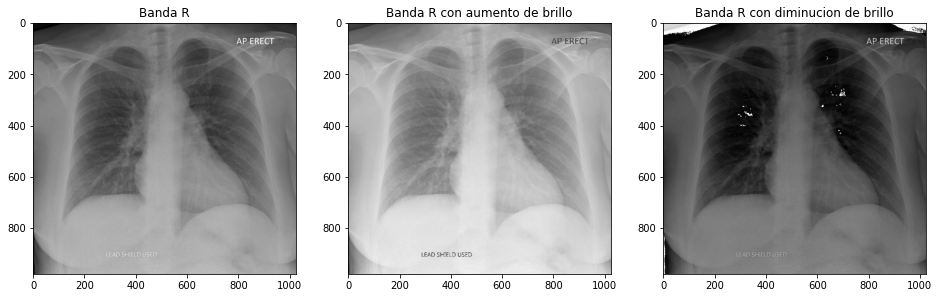

In [ ]:
############################################################
# Brillo: es una adicion lineal a los valores de los pixeles de la imagen 
# Recordar: tipo de variable de los pixeles es unit8(entero sin signo de 8 bits (de 0 a 255))
# ¿Que pasa si sobrepasa este valor?
# Por ejemplo si quiero asignar 260 = 255 + 5 . Entonces el 260 en unit8 es 5.
# Por lo cual el 260 va tener una tonalidad oscura
# Por ejemplo si quiero representar -5 , este sera igual a 250 en unit8.
# Valores negativos de las operaciones : son representados por valores blancos
############################################################
a = mpimg.imread('xray.jpeg')[:,:,0] 

mas_brillo=a+50
menos_brillo=a-50 # si es -5 , seria 250 en valor unit8
# En matlab a los extremos a los extremos los normaliza a 0 o 255
plt.figure(1,figsize=(16,20))
plt.subplot(1, 3, 1)
plt.imshow(a,cmap='gray')
plt.title('Banda R')

plt.subplot(1, 3, 2)
plt.imshow(mas_brillo,cmap='gray')
plt.title('Banda R con aumento de brillo')

plt.subplot(1, 3, 3)
plt.imshow(menos_brillo,cmap='gray')
plt.title('Banda R con diminucion de brillo')

print('imagen de entrada: \n')
print(a[0:4,0:4])
print('\n')
print('aumento de brillo: \n')
print(mas_brillo[0:4,0:4])
print('\n')
print('disminucion de brillo: \n')
print(menos_brillo[0:4,0:4])
print('\n')
# Valores altos representas valores blancos

## 1.4 Contraste

imagen de entrada: 

[[18 18 17 17 17 17 17 17 17 17]
 [18 18 17 17 17 17 17 17 17 17]
 [17 17 17 17 17 17 17 17 16 16]
 [17 17 17 16 16 16 16 16 15 15]
 [16 16 16 16 16 16 16 16 15 15]
 [16 16 16 16 16 16 15 15 15 15]
 [15 16 16 16 16 15 15 15 15 15]
 [15 15 16 16 16 15 15 14 15 15]
 [15 15 15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 14 14 14]]


aumento de brillo: 

[[72 72 68 68 68 68 68 68 68 68]
 [72 72 68 68 68 68 68 68 68 68]
 [68 68 68 68 68 68 68 68 64 64]
 [68 68 68 64 64 64 64 64 60 60]
 [64 64 64 64 64 64 64 64 60 60]
 [64 64 64 64 64 64 60 60 60 60]
 [60 64 64 64 64 60 60 60 60 60]
 [60 60 64 64 64 60 60 56 60 60]
 [60 60 60 60 60 60 60 60 60 60]
 [60 60 60 60 60 60 60 56 56 56]]


disminucion de brillo: 

[[ 4.5   4.5   4.25 ...  0.5   0.5   0.5 ]
 [ 4.5   4.5   4.25 ...  0.    0.5   0.5 ]
 [ 4.25  4.25  4.25 ...  0.25  0.    0.  ]
 ...
 [ 0.    0.25  0.   ... 36.5  35.75 34.5 ]
 [ 0.25  0.    0.   ... 36.25 36.   35.25]
 [ 0.25  0.    0.   ... 36.   36.   35.5 ]]




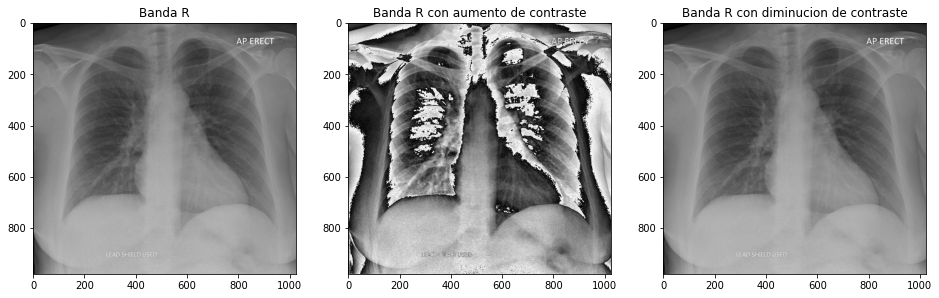

In [ ]:
##############################################################
# Contraste : es una operación aritmética que se le hace a cada uno de los pixeles, consiste en 
# aumentar el contraste a la hora que multiplicas o disminuir a la hora que divides
##############################################################
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

a = mpimg.imread('xray.jpeg')[:,:,0]
#mas_contraste=(a*2).astype(np.uint8)
mas_contraste=a*4
menos_contraste=a/4

plt.figure(1,figsize=(16,20))
plt.subplot(1, 3, 1)
plt.imshow(a,cmap='gray')
plt.title('Banda R')

plt.subplot(1, 3, 2)
plt.imshow(mas_contraste,cmap='gray')
plt.title('Banda R con aumento de contraste')

plt.subplot(1, 3, 3)
plt.imshow(menos_contraste,cmap='gray')
plt.title('Banda R con diminucion de contraste')

print('imagen de entrada: \n')
print(a[0:10,0:10])
print('\n')
print('aumento de brillo: \n')
print(mas_contraste[0:10,0:10])
print('\n')
print('disminucion de brillo: \n')
print(menos_contraste)
print('\n')

In [ ]:
# Cuando aumentamos el contraste la imagen se destruye(multiplicamos por 4)
# Pero cuando dismnuimos el brillo sale practicamente la misma imagen
# ¿Por que cuando aumento el contraste se destruye la imagen y por que cuando disminuyo el contaste no pasa nada?

In [ ]:
# 1era imagen:
# Cuando se multiplica sobrepasa el margen(2da imagen).Es por ello que la imagen se distorsiona
# Intensidad de 100 a 400 ,hace ida y vuelta muchas veces y llega a 30

In [ ]:
# 2da imagen: se mantiene el rango de valores de 0 a 255
# imshow normaliza las imagenes para mostrarlas, por conclusion se termina mostrando la misma imagen

## 1.5 Ejercicio ( 10 min - 1 punto )

Elaborar un funcion que cumpla lo siguiente:


*   Debe de recibir de parametro una imagen tipo float
*   Si el valor de las intensidades es mas que 255, se le asigna el valor de 255.
*   Si el valor de las intensidades es menor que 0 , se le asigna el valor es 0
*   La funcion debe retornar la imagen con los cambios asignados.

In [ ]:
# Para realizar operaciones entre imagenes se deben convertir estas a tipo float
# Si se tiene un pixel con valor 200 y otro pixel con valor de 100 al sumarlos sera 300
# en unit8 sera 45( Esta mal! ). Por esto las operaciones en imagenes se realizan convirtiendo las imagenes en tipo float.
def equilibrio(img):
  """
  Funcion que sirve para corregir la 2da imagen en la que se aumento el contraste
  """
  dim=img.shape
  for i in range(dim[0]):
    for j in range(dim[1]):
      if (img[i][j] > 255.0 ):
        img[i][j] = 255.0
      if (img[i][j] < 0.0 ):
        img[i][j] = 0.0
  
  return img

imagen de entrada: 

[[18. 18. 17. 17.]
 [18. 18. 17. 17.]
 [17. 17. 17. 17.]
 [17. 17. 17. 16.]]


aumento de brillo: 

[[118. 118. 117. 117.]
 [118. 118. 117. 117.]
 [117. 117. 117. 117.]
 [117. 117. 117. 116.]]


disminucion de brillo: 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]




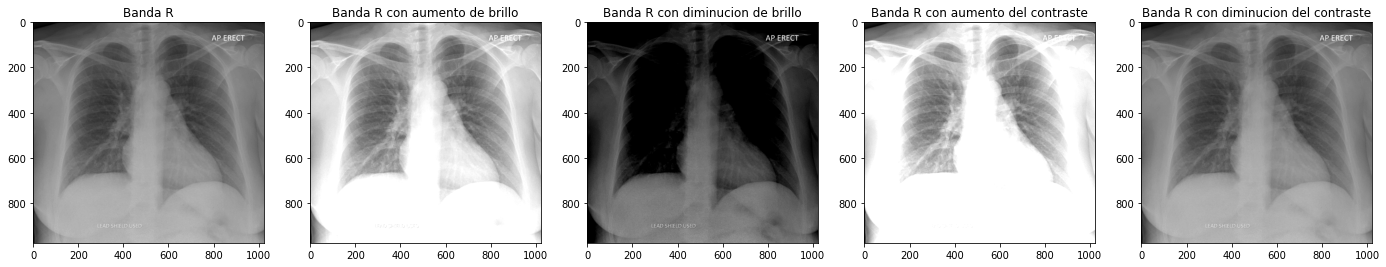

In [ ]:
a = mpimg.imread('xray.jpeg')[:,:,0] # unit8
a1=np.array(a,dtype=float) # Convertimos a tipo float

mas_brillo=a1+100.0
menos_brillo=a1-100.0

mas_contraste=a1*2.0
menos_contraste=a1/2.0

mas_brillo=equilibrio(mas_brillo)
menos_brillo=equilibrio(menos_brillo)

mas_contraste=equilibrio(mas_contraste)
menos_contraste=equilibrio(menos_contraste)

plt.figure(1,figsize=(24,20))
plt.subplot(1, 5, 1)
plt.imshow(a,cmap='gray')
plt.title('Banda R')

plt.subplot(1, 5, 2)
plt.imshow(mas_brillo,cmap='gray')
plt.title('Banda R con aumento de brillo')

plt.subplot(1, 5, 3)
plt.imshow(menos_brillo,cmap='gray')
plt.title('Banda R con diminucion de brillo')

plt.subplot(1, 5, 4)
plt.imshow(mas_contraste,cmap='gray')
plt.title('Banda R con aumento del contraste')

plt.subplot(1, 5, 5)
plt.imshow(menos_contraste,cmap='gray')
plt.title('Banda R con diminucion del contraste')

print('imagen de entrada: \n')
print(a1[0:4,0:4])
print('\n')
print('aumento de brillo: \n')
print(mas_brillo[0:4,0:4])
print('\n')
print('disminucion de brillo: \n')
print(menos_brillo[0:4,0:4])
print('\n')

## 1.6 Adicion 

imagen 1: 

[[169 168 174 175 177 177 181 179 178 183]
 [174 175 176 173 180 179 179 177 181 183]
 [171 178 172 177 177 178 180 182 184 179]
 [170 173 177 171 178 178 183 181 182 180]
 [172 174 174 172 174 175 180 177 182 184]
 [179 175 173 181 178 181 186 181 185 184]
 [174 170 170 176 171 179 182 180 176 185]
 [175 173 174 171 177 181 181 181 179 181]
 [173 170 174 176 174 175 178 178 184 185]
 [176 176 174 175 172 178 179 188 182 183]]


imagen 2: 

[[158 168 172 158 165 174 165 173 168 161]
 [174 164 170 167 168 171 168 169 169 158]
 [164 170 168 178 168 160 185 166 160 174]
 [163 168 173 166 171 173 160 164 168 161]
 [171 147 160 161 161 168 156 154 161 145]
 [159 166 153 160 155 146 157 147 136 153]
 [161 156 155 146 158 149 149 153 136 123]
 [158 146 160 152 146 156 147 126  86  39]
 [155 164 152 152 158 142 148  99  53  23]
 [152 161 147 153 157 146 131 101  46  21]]


Adicion: 

[[ 71  80  90  77  86  95  90  96  90  88]
 [ 92  83  90  84  92  94  91  90  94  85]
 [ 79  92  84

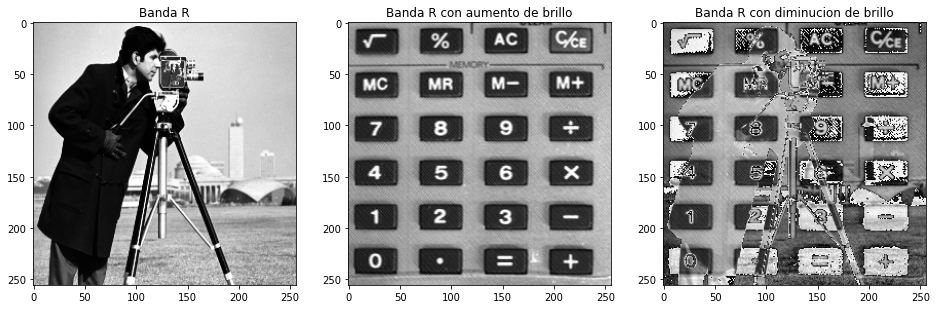

In [ ]:
a = mpimg.imread('cameraman.tif')
b = mpimg.imread('keyb.tif')

# una imagen es una señal por lo cual deben tener el mismo dominio para realizar operaciones entre ellas
# Dimensionamos la imagen
b_res = cv2.resize( b , dsize=(a.shape[0],a.shape[1]), interpolation=cv2.INTER_CUBIC)
# Metodo de interpolacion INTER_CUBIC para poder asignar los valores aproximadamente
# Revisar metodos de interpolacion
adicion = a+b_res

plt.figure(1,figsize=(16,20))
plt.subplot(1, 3, 1)
plt.imshow(a,cmap='gray')
plt.title('Banda R')

plt.subplot(1, 3, 2)
plt.imshow(b_res,cmap='gray')
plt.title('Banda R con aumento de brillo')

plt.subplot(1, 3, 3)
plt.imshow(adicion,cmap='gray')
plt.title('Banda R con diminucion de brillo')

print('imagen 1: \n')
print(a[0:10,0:10])
print('\n')
print('imagen 2: \n')
print(b_res[0:10,0:10])
print('\n')
print('Adicion: \n')
print(adicion[0:10,0:10])
print('\n')

In [ ]:
# Se sobrepasa los valores del rango de 0 a 255 por eso es que se muestran imagenes raras

## 1.7 Sustraccion

imagen 1: 

[[169 168 174 175 177 177 181 179 178 183]
 [174 175 176 173 180 179 179 177 181 183]
 [171 178 172 177 177 178 180 182 184 179]
 [170 173 177 171 178 178 183 181 182 180]
 [172 174 174 172 174 175 180 177 182 184]
 [179 175 173 181 178 181 186 181 185 184]
 [174 170 170 176 171 179 182 180 176 185]
 [175 173 174 171 177 181 181 181 179 181]
 [173 170 174 176 174 175 178 178 184 185]
 [176 176 174 175 172 178 179 188 182 183]]


imagen 2: 

[[158 168 172 158 165 174 165 173 168 161]
 [174 164 170 167 168 171 168 169 169 158]
 [164 170 168 178 168 160 185 166 160 174]
 [163 168 173 166 171 173 160 164 168 161]
 [171 147 160 161 161 168 156 154 161 145]
 [159 166 153 160 155 146 157 147 136 153]
 [161 156 155 146 158 149 149 153 136 123]
 [158 146 160 152 146 156 147 126  86  39]
 [155 164 152 152 158 142 148  99  53  23]
 [152 161 147 153 157 146 131 101  46  21]]


Adicion: 

[[ 71  80  90  77  86  95  90  96  90  88]
 [ 92  83  90  84  92  94  91  90  94  85]
 [ 79  92  84

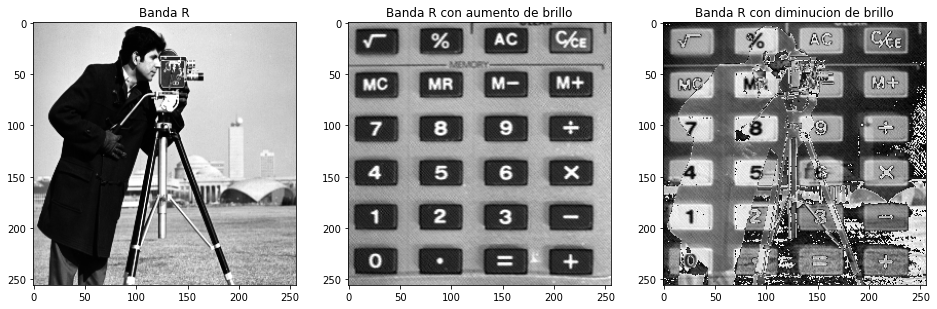

In [ ]:
sustraccion = a - b_res 

plt.figure(1,figsize=(16,20))
plt.subplot(1, 3, 1)
plt.imshow(a,cmap='gray')
plt.title('Banda R')

plt.subplot(1, 3, 2)
plt.imshow(b_res,cmap='gray')
plt.title('Banda R con aumento de brillo')

plt.subplot(1, 3, 3)
plt.imshow(sustraccion,cmap='gray')
plt.title('Banda R con diminucion de brillo')

print('imagen 1: \n')
print(a[0:10,0:10])
print('\n')
print('imagen 2: \n')
print(b_res[0:10,0:10])
print('\n')
print('Adicion: \n')
print(adicion[0:10,0:10])
print('\n')

## 1.8 Adicion-Sustraccion

Text(0.5, 1.0, 'Imagen 1 - Imagen 2')

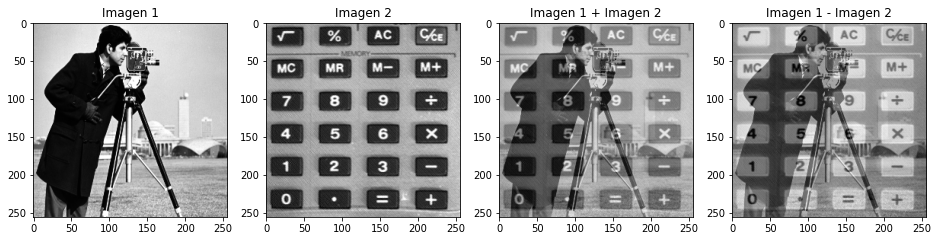

In [ ]:
a = mpimg.imread('cameraman.tif')
b = mpimg.imread('keyb.tif')

b_res = cv2.resize( b , dsize=(a.shape[0],a.shape[1]), interpolation=cv2.INTER_CUBIC)

# Convertimos a flotante en vez de usar a funcion equilibrio
adicion=np.array(a,dtype=float)+np.array(b_res,dtype=float)
sustraccion=np.array(a,dtype=float)-np.array(b_res,dtype=float)

plt.figure(1,figsize=(16,20))
plt.subplot(1, 4, 1)
plt.imshow(a,cmap='gray')
plt.title('Imagen 1')

plt.subplot(1, 4, 2)
plt.imshow(b_res,cmap='gray')
plt.title('Imagen 2')

plt.subplot(1, 4, 3)
plt.imshow(adicion,cmap='gray') # Ojo: se normaliza solo para mostrarlo
plt.title('Imagen 1 + Imagen 2')

plt.subplot(1, 4, 4)
plt.imshow(sustraccion,cmap='gray' )# Ojo: se normaliza solo para mostrarlo
plt.title('Imagen 1 - Imagen 2')
# Para que cambie los valores se debe usar la funcion equilibrio

## 1.9 Multiplicacion

In [ ]:
def Normalizar(f):
  faux = np.ravel(f).astype(float)
  minimum = faux.min()
  maximum = faux.max()
  g = (faux-minimum)*(255) / (maximum-minimum)
  r = g.reshape(f.shape).astype(np.uint8)
  return(r)

# Normalizar != Equilibrio
# Equilibrio: los valores superiores los deja en 255
# Normalizar: si tengo un rango de valores de [-200-100] los normaliza a 0-255

### 1.9.1 Ejemplo 1

In [ ]:
a = mpimg.imread('cameraman.tif')
dim = a.shape

In [ ]:
# Imagen sintetica

control=1
rows = np.linspace(control*-1, control, dim[0])
cols = np.linspace(-1*control, control, dim[1])
r, c = np.meshgrid(rows, cols, indexing='ij')
w=0.7
z=np.exp((-(r**2+c**2))/(2*(w**2)))
f_normalizado=Normalizar(z)

Text(0.5, 1.0, 'Imagen resultante')

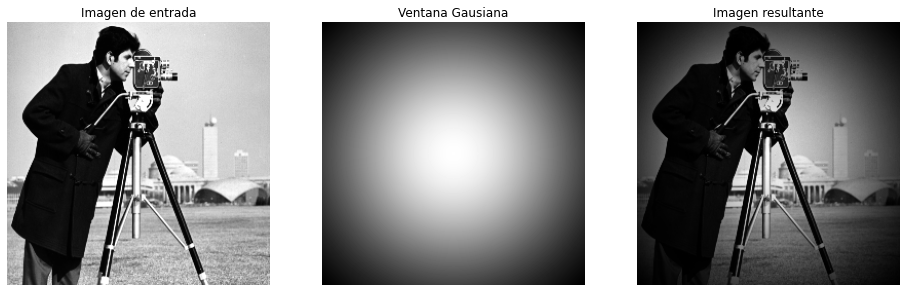

In [ ]:
Resultante=a*f_normalizado
# Se multiplican las imagenes
Resultante=(np.array(a,dtype=float)*np.array(f_normalizado,dtype=float))/255.0 # se divide para que se respete el rango de 0-255
Resultante=np.array(Resultante,dtype=np.uint8)

plt.figure(1,figsize=(16,20))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(a,cmap='gray')
plt.title('Imagen de entrada')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(f_normalizado,cmap='gray')
plt.title('Ventana Gausiana')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(Resultante,cmap='gray')
plt.title('Imagen resultante')

In [ ]:
# Ventana gaussiana permite mapear la atención
# Cuantifica el grado de atención

### 1.9.2 Ejemplo 2

Implemente un script que realice la multiplicacion de una imagen color con una imagen sintetica , el resultado debe ser mostrado de la siguiente forma:

In [ ]:
a = mpimg.imread('cameraman.tif')
dim = a.shape

In [ ]:
# Ventana gausiana
control=4
rows = np.linspace(control*-1, control, dim[0]) # coordenadas das linhas
cols = np.linspace(-1*control, control, dim[1]) # coordenadas das colunas
r, c = np.meshgrid(rows, cols, indexing='ij')
e = np.spacing(1)
print(e)
z = np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e)
f_normalizado=Normalizar(z) 

2.220446049250313e-16


Text(0.5, 1.0, 'Imagen resultante')

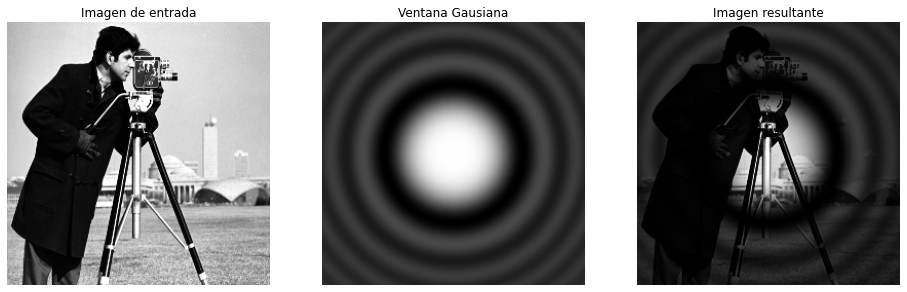

In [ ]:
a_new=(np.array(a,dtype=float)*np.array(f_normalizado,dtype=float))/255.0
a_new=np.array(a_new,dtype=np.uint8)

plt.figure(1,figsize=(16,20))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(a,cmap='gray')
plt.title('Imagen de entrada')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(f_normalizado,cmap='gray')
plt.title('Ventana Gausiana')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(a_new,cmap='gray')
plt.title('Imagen resultante')

##1.10 Mezclado alfa

Text(0.5, 1.0, 'Imagen A y B con mezclado alfa')

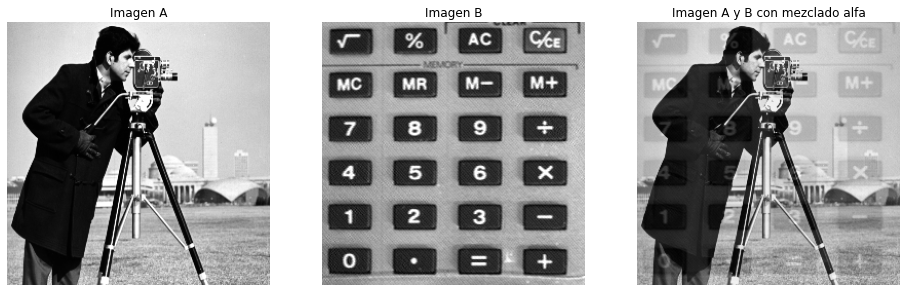

In [ ]:
# Es la suma de dos numeros
a = mpimg.imread('cameraman.tif')
b = mpimg.imread('keyb.tif')

alfa = 0.2 # Variable de control: 

b_res = cv2.resize( b , dsize=(a.shape[0],a.shape[1]), interpolation=cv2.INTER_CUBIC)
mezclado_alfa = (1-alfa)*a + b_res*alfa 

plt.figure(1,figsize=(16,20))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(a,cmap='gray')
plt.title('Imagen A')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(b_res,cmap='gray')
plt.title('Imagen B')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(mezclado_alfa,cmap='gray')
plt.title('Imagen A y B con mezclado alfa')

## 1.11 Ejercicio ( 10 min - 1 punto )

Usar ***interact*** para variar el valor Alfa y ver la transicion entre las dos imagenes.

In [ ]:
def MezcladoAlfa(alfa):
  a = mpimg.imread('cameraman.tif')
  b = mpimg.imread('keyb.tif')

  b_res = cv2.resize( b , dsize=(a.shape[0],a.shape[1]), interpolation=cv2.INTER_CUBIC)
  mezclado_alfa = (1-alfa)*a + b_res*alfa 

  plt.figure(1,figsize=(16,20))
  plt.subplot(1, 3, 1)
  plt.imshow(a,cmap='gray')
  plt.title('Imagen A')

  plt.subplot(1, 3, 2)
  plt.imshow(b_res,cmap='gray')
  plt.title('Imagen B')

  plt.subplot(1, 3, 3)
  plt.imshow(mezclado_alfa,cmap='gray')
  plt.title('Imagen A y B con mezclado alfa')

  return


interact(MezcladoAlfa, alfa=(0.0,1.0,0.01) , )

interactive(children=(FloatSlider(value=0.5, description='alfa', max=1.0, step=0.01), Output()), _dom_classes=…

<function __main__.MezcladoAlfa>

# 2. Tarea 3


Implementar un script que nos permita ver la varicion entre el uso del contraste y brillo.


*   Se debe utilizar ***interact*** , para variar el contraste y el brillo.
*   El titulo de la segunda imagen debe cambiar acorde al valor de contraste y del brillo.
* El contraste debe variar entre [ 0 , 3 ]
* El brillo debe variar entre [ 0 , 100 ]



In [ ]:
#img_new = img_prueba*contrs+brillo
#Barra de contraste y brillo
#se debe mostrar imagen original e imagen nueva

In [ ]:
# Espectro de forier en imagenes 
# kernel gaussiano : generaod  apartir de funcion de gauss

In [ ]:
# 1.Filros lineales
# Filtro de diferencia: deteccion de contornos
# Filtro de suavizado : para detectar caras
# 2.Filtros no lineales: medianan. maximo , minimo

In [ ]:
# Filtro lineal-suavizado : si no se divide sobre 9 solo se suma , si solo sumo se va a sobrepasar el valor
# maximo permitido
# Filtro-Lineal-Suavizado-Gaussiano: 